In [ ]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import zipfile

zip_path = '/content/images_fungal.zip'  # Replace with the actual path to your uploaded zip file

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted')  # Specify the destination directory to extract to

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# grader-required-cell

source_path = '/content/drive/MyDrive/Capstone/Fungal V Non-Fungal'

source_path_fungal = os.path.join(source_path, 'images_fungal')
source_path_non_fungal = os.path.join(source_path, 'non_fungal')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_fungal))} images of Fungal Infection.")
print(f"There are {len(os.listdir(source_path_non_fungal))} images of Non Fungal")

There are 88 images of Fungal Infection.
There are 51 images of Non Fungal


In [ ]:
# grader-required-cell

# Define root directory
root_dir = '/content/drive/MyDrive/Capstone/mencoba'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """
  ### START CODE HERE
  os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  val_dir = os.path.join(root_path, 'validation')

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  train_cats_dir = os.path.join(train_dir, 'fungal')
  train_dogs_dir = os.path.join(train_dir, 'nonfung')
  val_cats_dir = os.path.join(val_dir, 'fungal')
  val_dogs_dir = os.path.join(val_dir, 'nonfung')

  os.makedirs(train_cats_dir)
  os.makedirs(train_dogs_dir)
  os.makedirs(val_cats_dir)
  os.makedirs(val_dogs_dir)

  pass
  

  ### END CODE HERE

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# grader-required-cell

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Capstone/mencoba/training
/content/drive/MyDrive/Capstone/mencoba/validation
/content/drive/MyDrive/Capstone/mencoba/training/fungal
/content/drive/MyDrive/Capstone/mencoba/training/nonfung
/content/drive/MyDrive/Capstone/mencoba/validation/fungal
/content/drive/MyDrive/Capstone/mencoba/validation/nonfung


In [ ]:
# # function to crop image
# # note: the amount of croped pixels were approxed by me (nopal) 
# #       by measure the excess pixels
# def crop_image(image):
#     crop_width = 1920 - 170 - 160  # Calculate the resulting width after trimming
#     crop_height = 1080  # Height remains the same
#     crop_location = (170, 0)  # Starting position of the crop
#     cropped_image = tf.image.crop(image, crop_location, [crop_height, crop_width])
#     return cropped_image

In [ ]:
# def crop_image(image):
#     crop_width = 1920 - 170 - 150  # Calculate the resulting width after trimming
#     crop_height = 1080  # Height remains the same
#     crop_location = (170, 0)  # Starting position of the crop

#     # Crop the image using array indexing
#     cropped_image = image[crop_location[1]:crop_location[1] + crop_height,
#                           crop_location[0]:crop_location[0] + crop_width, :]

#     return cropped_image

In [ ]:
# # function to split dataset into training and validation
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     files = os.listdir(SOURCE_DIR)

#     verified_files = []
#     for file in files:
#         if os.path.getsize(os.path.join(SOURCE_DIR, file)) == 0:
#             print(f"{file} is zero length, so ignoring.")
#         else:
#             verified_files.append(file)

#     # Shuffle the files
#     random.shuffle(verified_files)

#     # Calculate the split index
#     split_idx = int(SPLIT_SIZE * len(verified_files))

#     # Split the files
#     train_files = verified_files[:split_idx]
#     val_files = verified_files[split_idx:]

#     # Copy train files
#     for file in train_files:
#         src_path = os.path.join(SOURCE_DIR, file)
#         dst_path = os.path.join(TRAINING_DIR, file)
#         # Load the image using TensorFlow
#         image = tf.io.read_file(src_path)
#         image = tf.image.decode_image(image)
#         # Crop the image
#         cropped_image = crop_image(image)
#         # Save the cropped image to the destination directory
#         tf.io.write_file(dst_path, tf.image.encode_png(cropped_image))

#     # Copy validation files
#     for file in val_files:
#         src_path = os.path.join(SOURCE_DIR, file)
#         dst_path = os.path.join(VALIDATION_DIR, file)
#         # Load the image using TensorFlow
#         image = tf.io.read_file(src_path)
#         image = tf.image.decode_image(image)
#         # Crop the image
#         cropped_image = crop_image(image)
#         # Save the cropped image to the destination directory
#         tf.io.write_file(dst_path, tf.image.encode_png(cropped_image))

In [ ]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  file_list = []


  for file in os.listdir(SOURCE_DIR):
    file_path = os.path.join(SOURCE_DIR,file)
    if(os.path.getsize(file_path) == 0):
      print(file + " is zero length, so ignoring.")
    else:
      file_list.append(file_path)

  train_num_items = int(round(len(file_list) * SPLIT_SIZE, 0))
  train_list = random.sample(file_list, train_num_items)
  val_list = list(set(file_list) - set(train_list))

  for f in train_list:
    copyfile(f,TRAINING_DIR+os.path.basename(f))
  for f in val_list:
    copyfile(f,VALIDATION_DIR+os.path.basename(f))

  pass

  ### END CODE HERE

In [ ]:
import random

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  file_list = []

  for file in os.listdir(SOURCE_DIR):
    file_path = os.path.join(SOURCE_DIR, file)
    if os.path.getsize(file_path) == 0:
      print(file + " is zero length, so ignoring.")
    else:
      file_list.append(file_path)

  random.shuffle(file_list)  # Shuffle the file list randomly

  train_num_items = int(round(len(file_list) * SPLIT_SIZE, 0))
  train_list = file_list[:train_num_items]
  val_list = file_list[train_num_items:]

  for f in train_list:
    copyfile(f, TRAINING_DIR + os.path.basename(f))
  for f in val_list:
    copyfile(f, VALIDATION_DIR + os.path.basename(f))

  pass

In [ ]:
# grader-required-cell

# Test your split_data function

# Define paths
CAT_SOURCE_DIR = "/content/drive/MyDrive/Capstone/Fungal V Non-Fungal/images_fungal"
DOG_SOURCE_DIR = "/content/drive/MyDrive/Capstone/Fungal V Non-Fungal/non_fungal"

TRAINING_DIR = "/content/drive/MyDrive/Capstone/mencoba/training"
VALIDATION_DIR = "/content/drive/MyDrive/Capstone/mencoba/validation"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "fungal/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "fungal/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "nonfung/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "nonfung/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal fungal directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original healthy directory has {len(DOG_SOURCE_DIR)} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of fungal for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of healthy for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of fungal for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of healthy for validation")



Original fungal directory has 88 images
Original healthy directory has 62 images

There are 70 images of fungal for training
There are 41 images of healthy for training
There are 18 images of fungal for validation
There are 10 images of healthy for validation


In [ ]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(    
    rescale=1.0/255.)
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True,
    # fill_mode='nearest')
    # rescale=1.0/255,
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # horizontal_flip=True,)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='binary',
                                                      target_size=(128, 128))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(
    rescale=1.0/255.)
    # rotation_range=10,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # shear_range=0.1,
    # zoom_range=0.1,
    # horizontal_flip=True,
    # fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='binary',
                                                                target_size=(128, 128))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# grader-required-cell

# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 111 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [ ]:
# grader-required-cell

# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9:
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 64)      

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
model = create_model()
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 2,
                    callbacks=callbacks)

Epoch 1/50
7/7 - 8s - loss: 0.6299 - accuracy: 0.7117 - val_loss: 0.5151 - val_accuracy: 0.6429 - 8s/epoch - 1s/step
Epoch 2/50
7/7 - 7s - loss: 0.4252 - accuracy: 0.7928 - val_loss: 0.3054 - val_accuracy: 0.8929 - 7s/epoch - 965ms/step
Epoch 3/50
7/7 - 7s - loss: 0.4865 - accuracy: 0.8018 - val_loss: 0.3459 - val_accuracy: 0.8571 - 7s/epoch - 1s/step
Epoch 4/50
7/7 - 5s - loss: 0.3999 - accuracy: 0.8198 - val_loss: 0.3369 - val_accuracy: 0.8929 - 5s/epoch - 781ms/step
Epoch 5/50
7/7 - 7s - loss: 0.3243 - accuracy: 0.8649 - val_loss: 0.2910 - val_accuracy: 0.9286 - 7s/epoch - 1s/step
Epoch 6/50

Reached 99.9% accuracy so cancelling training!
7/7 - 6s - loss: 0.2556 - accuracy: 0.9189 - val_loss: 0.2559 - val_accuracy: 0.9286 - 6s/epoch - 909ms/step


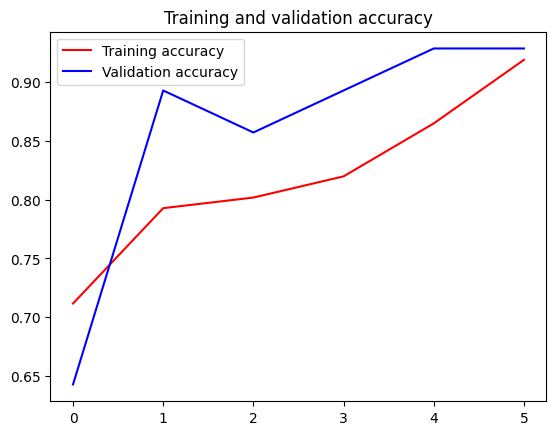

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"
model.save(saved_model_path)

# YOUR CODE HERE

In [ ]:
!pip install tensorflow==2.2
!pip install tensorflowjs
import tensorflow as tf

print('\u2022 Using TensorFlow Version:', tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing 

• Using TensorFlow Version: 2.12.0


In [ ]:
# EXERCISE: Use the tensorflow.js converter to convert the saved Keras model into JSON format.
# YOUR CODE HERE
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2023-06-09 17:05:17.114648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import zipfile

# Specify the filenames
h5_file = "./my_model.h5"
json_file = "./model.json"

# Create a zip file
zip_file_name = "Fungal vs Non Fungal.zip"
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    # Add the h5 file to the zip
    zipf.write(h5_file, arcname='my_model.h5')

    # Add the json file to the zip
    zipf.write(json_file, arcname='model.json')

print("Output files zipped successfully!")


Output files zipped successfully!


In [ ]:
import zipfile

# Specify the filenames
h5_file = "./my_model.h5"
json_file = "./model.json"
bin_file1 = "./group1-shard1of3.bin"
bin_file2 = "./group1-shard2of3.bin"
bin_file3 = "./group1-shard3of3.bin"

# Create a zip file
zip_file_name = "fungal vs non fung.zip"
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    # Add the h5 file to the zip
    zipf.write(h5_file, arcname='my_model.h5')

    # Add the json file to the zip
    zipf.write(json_file, arcname='model.json')
    
    # Add the bin files to the zip
    zipf.write(bin_file1, arcname='group1-shard1of3.bin')
    zipf.write(bin_file2, arcname='group1-shard2of3.bin')
    zipf.write(bin_file3, arcname='group1-shard3of3.bin')

print("Output files zipped successfully!")

Output files zipped successfully!


In [ ]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [ ]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
7/7 [==============================] - 11s 1s/step - loss: 0.8026 - accuracy: 0.5946 - val_loss: 0.6582 - val_accuracy: 0.6429
Epoch 2/15
7/7 [==============================] - 11s 2s/step - loss: 0.6211 - accuracy: 0.6396 - val_loss: 0.5448 - val_accuracy: 0.7857
Epoch 3/15
7/7 [==============================] - 10s 1s/step - loss: 0.5450 - accuracy: 0.7748 - val_loss: 0.4371 - val_accuracy: 0.7500
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.4557 - accuracy: 0.8378 - val_loss: 0.3937 - val_accuracy: 0.8214
Epoch 5/15
7/7 [==============================] - 10s 1s/step - loss: 0.3216 - accuracy: 0.8919 - val_loss: 0.5124 - val_accuracy: 0.6429
Epoch 6/15
7/7 [==============================] - 11s 2s/step - loss: 0.3540 - accuracy: 0.8378 - val_loss: 0.4324 - val_accuracy: 0.7500
Epoch 7/15
7/7 [==============================] - 10s 2s/step - loss: 0.3335 - accuracy: 0.8739 - val_loss: 0.3482 - val_accuracy: 0.8214
Epoch 8/15
7/7 [===================

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [ ]:
from tensorflow.keras import models, layers

# Create a new model by adding your own classifier on top of the pre-trained ResNet model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
7/7 [==============================] - 70s 7s/step - loss: 2.0308 - accuracy: 0.6937 - val_loss: 2025.8903 - val_accuracy: 0.6429
Epoch 2/10
7/7 [==============================] - 44s 6s/step - loss: 0.2158 - accuracy: 0.9189 - val_loss: 143049.0156 - val_accuracy: 0.6429
Epoch 3/10
7/7 [==============================] - 43s 6s/step - loss: 0.2387 - accuracy: 0.9459 - val_loss: 532021.9375 - val_accuracy: 0.6429
Epoch 4/10
7/7 [==============================] - 47s 7s/step - loss: 0.1038 - accuracy: 0.9640 - val_loss: 515740.7812 - val_accuracy: 0.6429
Epoch 5/10
7/7 [==============================] - 44s 6s/step - loss: 0.1261 - accuracy: 0.9910 - val_loss: 254101.0938 - val_accuracy: 0.6429
Epoch 6/10
7/7 [==============================] - 46s 6s/step - loss: 0.2518 - accuracy: 0.9459 - val_loss: 105589.9453 - val_accuracy: 0.6429
Epoch 7/10
7/7 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9910

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.applications import ResNet50

# Initialize the Pretrained Model
feature_extractor = ResNet50(weights='imagenet', 
                             input_shape=(128, 128, 3),
                             include_top=False)

# Set this parameter to make sure it's not being trained
feature_extractor.trainable = False

# Set the input layer
input_ = tf.keras.Input(shape=(128, 128, 3))

# Set the feature extractor layer
x = feature_extractor(input_, training=False)

# Set the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Set the final layer with sigmoid activation function
output_ = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the new model object
model = tf.keras.Model(input_, output_)

# Compile it
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Print The Summary of The Model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
7/7 [==============================] - 20s 2s/step - loss: 0.7754 - accuracy: 0.3694 - val_loss: 0.7306 - val_accuracy: 0.3571
Epoch 2/15
7/7 [==============================] - 15s 2s/step - loss: 0.7080 - accuracy: 0.4234 - val_loss: 0.6729 - val_accuracy: 0.6429
Epoch 3/15
7/7 [==============================] - 16s 2s/step - loss: 0.6656 - accuracy: 0.6306 - val_loss: 0.6518 - val_accuracy: 0.6429
Epoch 4/15
7/7 [==============================] - 15s 2s/step - loss: 0.6527 - accuracy: 0.6306 - val_loss: 0.6462 - val_accuracy: 0.6429
Epoch 5/15
7/7 [==============================] - 15s 2s/step - loss: 0.6509 - accuracy: 0.6306 - val_loss: 0.6445 - val_accuracy: 0.6429
Epoch 6/15
7/7 [==============================] - 15s 2s/step - loss: 0.6506 - accuracy: 0.6306 - val_loss: 0.6429 - val_accuracy: 0.6429
Epoch 7/15
7/7 [==============================] - 15s 2s/step - loss: 0.6466 - accuracy: 0.6306 - val_loss: 0.6403 - val_accuracy: 0.6429
Epoch 8/15
7/7 [==================